<a href="https://colab.research.google.com/github/saivarshittha/ML-algorithms/blob/master/Dominant_Colour_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

[[[29 29 29]
  [29 29 29]
  [29 29 29]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 [[29 29 29]
  [29 29 29]
  [29 29 29]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 [[29 29 29]
  [29 29 29]
  [29 29 29]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 ...

 [[28 28 28]
  [29 29 29]
  [29 29 29]
  ...
  [14 14 14]
  [14 14 14]
  [14 14 14]]

 [[28 28 28]
  [29 29 29]
  [29 29 29]
  ...
  [14 14 14]
  [14 14 14]
  [14 14 14]]

 [[28 28 28]
  [29 29 29]
  [29 29 29]
  ...
  [14 14 14]
  [14 14 14]
  [14 14 14]]]


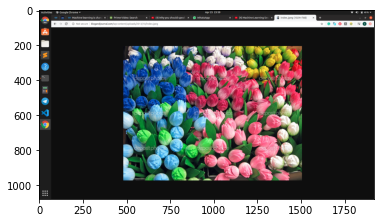

In [ ]:
img=cv2.imread('/content/flower.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_img =img
print(img)
plt.imshow(img)
plt.show()

In [ ]:
print(img.shape)

(1080, 1920, 3)


In [ ]:
all_pixels=img.reshape((1080*1920),3)

In [ ]:
print(all_pixels.shape)

(2073600, 3)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
dominant_colors = 6
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centers =km.cluster_centers_ 
centers =np.array(centers,dtype='uint8')
print(centers)

[[ 17  18  17]
 [219 154 143]
 [ 51 114 177]
 [228 233 237]
 [192  69  85]
 [ 52 111  59]]


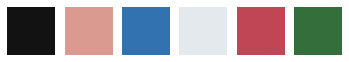

In [ ]:
i=1
colors=[]
for each_col in centers:
  plt.subplot(1,dominant_colors,i)
  plt.axis("off")
  i+=1
  colors.append(each_col)
  #color swatch
  a=np.zeros((100,100,3),dtype='uint8')
  a[:,:,:]=each_col
  plt.imshow(a)
plt.show()  


#Segmenting our original Image

In [ ]:
new_img = np.zeros((1080*1920,3),dtype='uint8')
print(new_img.shape)

In [ ]:
km.labels_

In [ ]:
arr=np.array(km.labels_)
print(arr.shape)

In [ ]:
for ix in range(new_img.shape[0]):
  new_img[ix]=colors[km.labels_[ix]]
print(new_img.shape)  
new_img = new_img.reshape((original_img.shape))

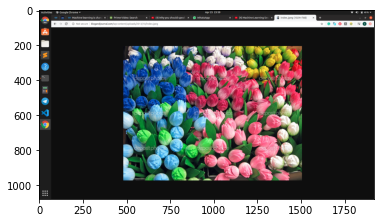

In [ ]:
plt.imshow(original_img)
plt.show()

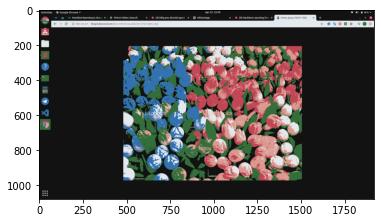

In [ ]:

plt.imshow(new_img)
plt.show()